<a href="https://colab.research.google.com/github/nicolas-pavon/Analitica_colab/blob/master/Entrega%203/Housing_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.1.0
!pip install keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#para acceder a archivos desde google drive en google colaboratory
#acceso a google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#
file_id = '1pe9H6JpbYgQaXKpOP0lNjoNS2cwmUjNA' #copiar nombre nombre del link de compartir despues de ID
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('housing.csv')

file_id_2 = '1WsYjme-Pilp2gfwUDINPUXm6mSw2dDwY' #copiar nombre nombre del link de compartir despues de ID
downloaded = drive.CreateFile({'id': file_id_2})
downloaded.GetContentFile('funciones_housing.py')

#base de datos
Xdata = pd.read_csv("housing.csv")

In [0]:
Xdata

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [0]:
#Paso 2: Particion entrenamiento y validacion
# Tamaño Xtrain 70%, Tamaño Xtest 30%
from funciones_housing import dummy_transformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_sal = "median_house_value"
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)

Xtrain, Xvalid = train_test_split(Xtrain,test_size=0.3)
ytrain, yvalid = train_test_split(ytrain,test_size=0.3)

ytrain = SimpleImputer(strategy="most_frequent").fit_transform(pd.DataFrame(ytrain))
ytest = SimpleImputer(strategy="most_frequent").fit_transform(pd.DataFrame(ytest))
yvalid = SimpleImputer(strategy="most_frequent").fit_transform(pd.DataFrame(yvalid))

Xtrain = dummy_transformer().fit_transform(Xtrain)
Xtest = dummy_transformer().fit_transform(Xtest)
Xvalid = dummy_transformer().fit_transform(Xvalid)

In [0]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)
Xvalid = np.array(Xvalid)

ytrain = np.array(ytrain)
ytest = np.array(ytest)
yvalid = np.array(yvalid)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)
Xvalid = scaler.transform(Xvalid)



In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(15, activation="tanh", input_shape=[9,]),
    keras.layers.Dense(2, activation="tanh"),
    keras.layers.Dense(1)
])

In [0]:
model.layers

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compilar modelo
model.compile(loss=keras.losses.mse,
              optimizer="sgd",
              metrics=[keras.losses.mae])

In [0]:
#Entrenamiento
history = model.fit(Xtrain, ytrain, epochs=30, batch_size=30,
                    validation_data=(Xvalid, yvalid))

Train on 10113 samples, validate on 4335 samples
Epoch 1/30
10113/10113 [==============================] - 1s 97us/sample - loss: 14664339117.2993 - mean_absolute_error: 94078.4453 - val_loss: 13402977660.8997 - val_mean_absolute_error: 90107.6406
Epoch 2/30
10113/10113 [==============================] - 1s 65us/sample - loss: 13445988194.9522 - mean_absolute_error: 91781.3594 - val_loss: 13437975452.7889 - val_mean_absolute_error: 92410.6406
Epoch 3/30
10113/10113 [==============================] - 1s 65us/sample - loss: 13454566095.6250 - mean_absolute_error: 91938.5312 - val_loss: 13385661996.2907 - val_mean_absolute_error: 90776.4375
Epoch 4/30
10113/10113 [==============================] - 1s 65us/sample - loss: 13452502359.8647 - mean_absolute_error: 91829.1719 - val_loss: 13410949720.5813 - val_mean_absolute_error: 91917.2734
Epoch 5/30
10113/10113 [==============================] - 1s 63us/sample - loss: 13443420663.0389 - mean_absolute_error: 91871.2266 - val_loss: 13405542355

In [0]:
history.params

{'batch_size': 30,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss',
  'mean_absolute_error',
  'val_loss',
  'val_mean_absolute_error'],
 'samples': 10113,
 'steps': 338,
 'verbose': 0}

In [0]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [0]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

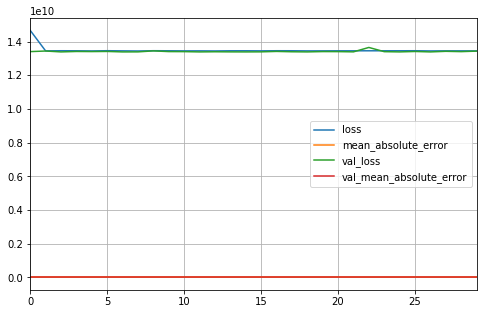

In [0]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#save_fig("keras_learning_curves_plot")
plt.show()

In [0]:
model.evaluate(Xtest, ytest)

6192/6192 [==============================] - 0s 34us/sample - loss: 13136333929.8398 - mean_absolute_error: 89034.8906


[13136333929.839794, 89034.89]

In [0]:
X_new = Xtest[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[199105.42],
       [199105.42],
       [199105.42]], dtype=float32)

In [0]:
y_pred = model.predict_classes(X_new)
y_pred

array([[1],
       [1],
       [1]], dtype=int32)